In [65]:
import pandas as pd
from sklearn.metrics import mean_squared_error ,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


DATA PREPROCESSING

In [67]:
#check for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [68]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [69]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

DATA VISUALIZATION


Text(0.5, 1.0, 'Correleeation HeatMap')

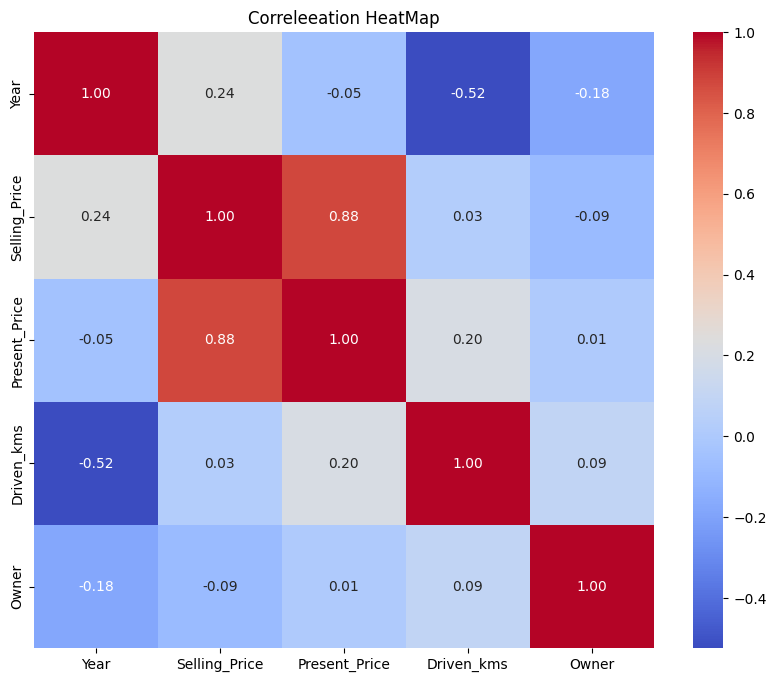

In [70]:
numerical=['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
numerical_df=df[numerical]

corr_matrix=numerical_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correleeation HeatMap")

Text(0.5, 1.0, 'Distribution of Sellinfg Prices')

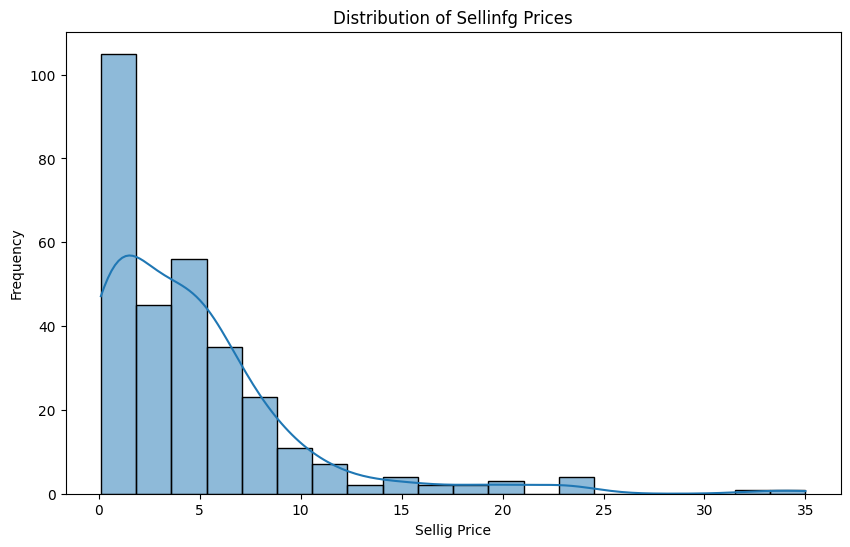

In [71]:
#Bar Graph
plt.figure(figsize=(10,6))
sns.histplot(df["Selling_Price"], bins=20, kde=True)
plt.xlabel("Sellig Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sellinfg Prices")

In [72]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [73]:
df.Selling_type.value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [74]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [75]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [76]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace = True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [77]:
X=df.drop(["Car_Name","Selling_Price"],axis=1)
y=df["Selling_Price"]

In [78]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [79]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [80]:
#train_test_splitup
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [81]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x_train,y_train)
y_pred=lin.predict(x_test)
lin_error=mean_squared_error(y_test,y_pred)
print("The Error rate is: ",lin_error)

lin_accuracy=r2_score(y_test,y_pred)
print("The accuracy in linear regression model is: ",lin_accuracy)

The Error rate is:  3.5315798889713346
The accuracy in linear regression model is:  0.8466902419662656


In [82]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
seed_value=42
dtree=DecisionTreeRegressor(random_state=seed_value)
dtree.fit(x_train,y_train)
dtree_ypred=dtree.predict(x_test)
dtree_accuracy=r2_score(y_test,dtree_ypred)
dtree_error=mean_squared_error(y_test,dtree_ypred)

print("The Error rate is: ",dtree_error)
print("The Decison Tree accuracy is: ",dtree_accuracy)

The Error rate is:  1.2617295081967213
The Decison Tree accuracy is:  0.9452269376066684


In [83]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
reger=RandomForestRegressor()
reger.fit(x_train,y_train)
reger_ypred=reger.predict(x_test)
reger_error=mean_squared_error(reger_ypred,y_test)
reger_accuracy=r2_score(reger_ypred,y_test)

print("The Error rate is: ",reger_error)
print("The Random Forest Tree accuracy is: ",reger_accuracy)


The Error rate is:  0.8403077257377053
The Random Forest Tree accuracy is:  0.9582561169770981


So, the car price Prediction is done with the help of models such as Linear Regression, Random Forest, Decision Tree.
